In [27]:
pip install pmlb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from pmlb import fetch_data
X,y = fetch_data('fars',return_X_y=True)

In [29]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import GridSearchCV

In [30]:
df=pd.DataFrame(X,columns=['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE'])
df['injury']=y

In [40]:
df

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,injury
0,0,34,1,1,3,7,2,2,9,1,...,0,2,0,5,0,27,29,19,17,1
1,0,20,1,1,3,7,9,2,9,1,...,0,2,0,5,0,27,29,19,17,1
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,27,29,19,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,2,27,29,19,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,2,27,29,19,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,50,10,0,6,13,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100964,50,9,0,6,16,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100965,50,7,0,6,14,4,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6
100966,50,4,0,6,14,4,4,0,0,1,...,0,2,0,6,2,27,29,19,11,6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   CASE_STATE                           100968 non-null  int64
 1   AGE                                  100968 non-null  int64
 2   SEX                                  100968 non-null  int64
 3   PERSON_TYPE                          100968 non-null  int64
 4   SEATING_POSITION                     100968 non-null  int64
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  int64
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  int64
 7   EJECTION                             100968 non-null  int64
 8   EJECTION_PATH                        100968 non-null  int64
 9   EXTRICATION                          100968 non-null  int64
 10  NON_MOTORIST_LOCATION                100968 non-null  int64
 11  POLICE_REPORTED_ALCOHOL_INVOLVEMENT  10

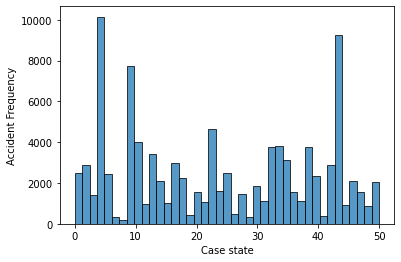

In [33]:
#df['CASE_STATE'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df,x='CASE_STATE')
plt.xlabel("Case state")
plt.ylabel("Accident Frequency")
plt.show()

In [38]:
sns.scatterplot(df[df['CASE_STATE']==4], x='AGE',y='injury')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

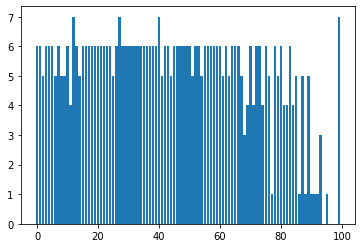

In [8]:
plt.bar(df[df['CASE_STATE']==30]['AGE'],df[df['CASE_STATE']==30]['injury'])
plt.show()

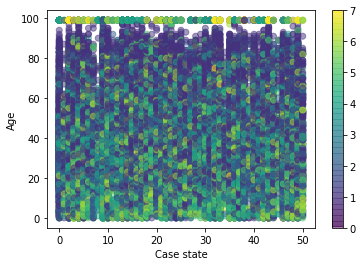

In [20]:
plt.scatter(df['CASE_STATE'], df['AGE'], c=df['injury'],alpha=0.5)
plt.xlabel("Case state")
plt.ylabel("Age")
plt.colorbar()
plt.show()

In [10]:
df['injury'].value_counts()

1    42116
4    20007
2    15072
5    13890
6     8674
7      901
3      299
0        9
Name: injury, dtype: int64

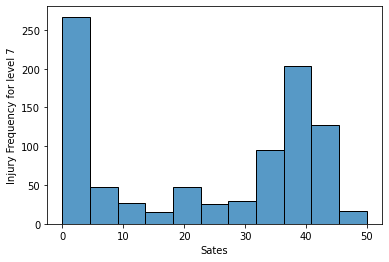

In [39]:
sns.histplot(data=df[df['injury']==7], x="CASE_STATE")
plt.xlabel("Sates")
plt.ylabel("Injury Frequency for level 7")
plt.show()

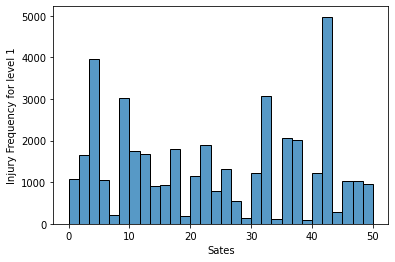

In [26]:
sns.histplot(data=df[df['injury']==1], x="CASE_STATE")
plt.xlabel("Sates")
plt.ylabel("Injury Frequency for level 1")
plt.show()

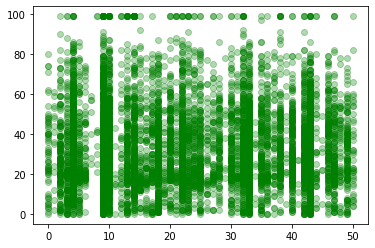

In [12]:
plt.scatter(df[df['injury']==6]['CASE_STATE'], df[df['injury']==6]['AGE'],c='green',alpha=0.3)
plt.show()

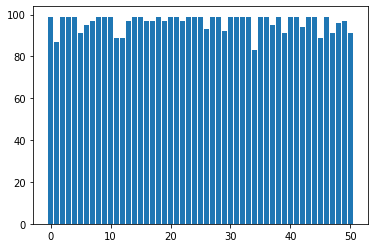

In [13]:
plt.bar(df[df['injury']==1]['CASE_STATE'], df[df['injury']==1]['AGE'])
plt.show()

In [14]:
df[df.isna().any(axis=1)]

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,injury


**Data Preprocessing**

In [15]:
X.shape

(100968, 29)

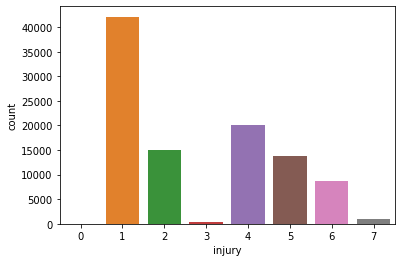

In [16]:
import seaborn as sns

sns.countplot(x='injury',data=pd.DataFrame(y,columns=['injury']))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

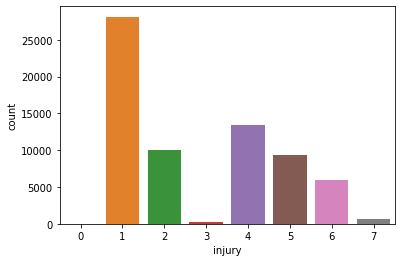

In [18]:
sns.countplot(x='injury',data=pd.DataFrame(y_train,columns=['injury']))

In [19]:
# Using SMOTE to overcome data imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train, y_train)

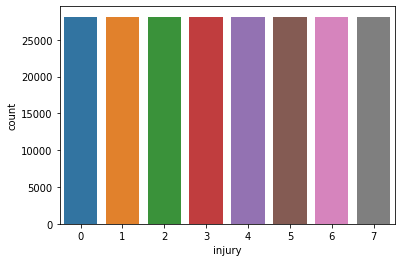

In [ ]:
sns.countplot(x='injury',data=pd.DataFrame(y_train,columns=['injury']))

In [42]:
x_train_df=pd.DataFrame(X_train,columns=['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE_(1_of_3)', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE'])

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif, k=15)
selector.fit(x_train_df, y_train)
cols = selector.get_support(indices=True)
cols_names = list(x_train_df.iloc[:, cols].columns)
cols_names

['AGE',
 'SEX',
 'PERSON_TYPE',
 'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'TAKEN_TO_HOSPITAL',
 'RELATED_FACTOR_(1)-PERSON_LEVEL',
 'RACE']

In [47]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler


pipeline_log_reg = Pipeline(
    [
     ('selector',SelectKBest(f_classif,k=15)),
     ('normalise',StandardScaler()),
     ('model',LogisticRegression(penalty='l2',max_iter=500))
    ]
)
pipeline_log_reg.fit(X_train,y_train)

Pipeline(steps=[('selector', SelectKBest(k=15)),
                ('normalise', StandardScaler()),
                ('model', LogisticRegression(max_iter=500))])

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

yhat = pipeline_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.6543517406962785

In [ ]:
#SVM
from sklearn import svm
pipeline_svm = Pipeline(
    [
     ('selector',SelectKBest(f_classif, k=15)),
     ('normalise',StandardScaler()),
     ('model',svm.SVC(kernel='rbf'))
    ]
)
pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('selector', SelectKBest(k=15)),
                ('normalise', StandardScaler()), ('model', SVC())])

In [ ]:
yhat = pipeline_svm.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.7632953181272509

In [ ]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline(
    [
     ('selector',SelectKBest(f_classif, k=15)),
     ('normalise',StandardScaler()),
     ('model',KNeighborsClassifier(n_neighbors=8))
    ]
)

pipeline_knn.fit(X_train,y_train)


Pipeline(steps=[('selector', SelectKBest(k=15)),
                ('normalise', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=8))])

In [ ]:
yhat = pipeline_knn.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.756812725090036

In [ ]:
# Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline_lda = Pipeline(
    [
     ('selector',SelectKBest(f_classif, k=15)),
     ('normalise',StandardScaler()),
     ('model',LinearDiscriminantAnalysis())
    ]
)

pipeline_lda.fit(X_train,y_train)



Pipeline(steps=[('selector', SelectKBest(k=15)),
                ('normalise', StandardScaler()),
                ('model', LinearDiscriminantAnalysis())])

In [ ]:
yhat = pipeline_lda.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
accuracy

0.6697478991596638

In [50]:
#Random forest,no scaling data
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

importances = rf.feature_importances_



In [ ]:
importances

array([1.14587677e-01, 2.11621336e-01, 3.76775113e-02, 1.94255085e-02,
       4.25205741e-02, 6.39894529e-02, 5.41202073e-02, 7.90258849e-03,
       8.06385956e-03, 3.32244071e-02, 3.45557844e-03, 2.39079607e-02,
       8.16037811e-03, 1.49240976e-02, 1.50547115e-02, 1.50319436e-02,
       3.41152730e-03, 1.02105061e-02, 1.56753011e-02, 6.90497520e-03,
       3.36065556e-03, 7.16508887e-03, 3.66729098e-03, 4.22104908e-02,
       1.22986081e-01, 1.76588398e-02, 5.42947264e-04, 1.30844292e-04,
       9.24076597e-02])

In [ ]:
# Train and test the model using the selected features
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7716686674669868

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7716686674669868

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7461284513805522

Hyperparameter tuning for best performing models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions={'n_estimators':[50,100,150,200] ,'max_depth': [25,50,75,85,None],
                                'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]},
                                cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 85}

In [51]:
#using the best params selected by tuning
rf = RandomForestClassifier(n_estimators=50,max_features='auto',max_depth=85,min_samples_split=10,min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7798019207683073

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.02


In [ ]:
scores

array([0.86972363, 0.89771389, 0.92079714, 0.92464064, 0.92492946])

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 85,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}